<a href="https://colab.research.google.com/github/Mung-Tamjung/PETECTIVE-ai/blob/main/dog_breeds_training_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd "/content/drive/MyDrive"
!pip install -U -r yolov5/requirements.txt

/content/drive/MyDrive
  Using cached numpy-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)


In [2]:
%cd "/content/drive/MyDrive/dataset"

/content/drive/MyDrive/dataset


In [4]:
!pwd

/content/drive/MyDrive/dataset


In [3]:
!curl -L "https://app.roboflow.com/ds/YZJc13tsg2?key=90Age7nOCc" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/labels/Retriever196_jpg.rf.372f1fbe35fa41e161f48ebcfd7d0351.txt  
  inflating: train/labels/Retriever196_jpg.rf.e0749b4a7efcd01a74735f8b781d2f08.txt  
  inflating: train/labels/Retriever197_jpg.rf.0c4241e7761199dd711b9a92a719f448.txt  
  inflating: train/labels/Retriever197_jpg.rf.82315619293073a2eae6c71b51a535ee.txt  
 extracting: train/labels/Retriever197_jpg.rf.f4b89fd502cf237a131db55b3bd6f94a.txt  
  inflating: train/labels/Retriever198_jpg.rf.7515fc962df8c24d3c5799e6a8baefef.txt  
  inflating: train/labels/Retriever198_jpg.rf.8149b72ff1980d85997ce8f16d7a54ea.txt  
  inflating: train/labels/Retriever198_jpg.rf.b7ffade70693d1e27ec417416af92902.txt  
  inflating: train/labels/Retriever1_jpeg.rf.35f42f6a0c84eadd75e17c1d8ccf976f.txt  
  inflating: train/labels/Retriever1_jpeg.rf.4e361e5afd25f4c53de682987759db7d.txt  
  inflating: train/labels/Retriever1_jpeg.rf.66869c178b0ecc3049561d139a068d5f.txt  
 extracting: train/labels/Retrie

In [5]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('/content/drive/MyDrive/dataset/train/images/*.jpg') + glob('/content/drive/MyDrive/dataset/train/images/*.jpeg') + glob('/content/drive/MyDrive/dataset/train/images/*.png')
valid_img_list = glob('/content/drive/MyDrive/dataset/valid/images/*.jpg') + glob('/content/drive/MyDrive/dataset/valid/images/*.jpeg') + glob('./content/drive/MyDrive/dataset/valid/images/*.png')
test_img_list = glob('/content/drive/MyDrive/dataset/test/images/*.jpg') + glob('/content/drive/MyDrive/dataset/test/images/*.jpeg') + glob('./content/drive/MyDrive/dataset/test/images/*.png')


# txt 파일에 write
with open('/content/drive/MyDrive/dataset/train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')

with open('/content/drive/MyDrive/dataset/valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

with open('/content/drive/MyDrive/dataset/test.txt', 'w') as f:
	f.write('\n'.join(test_img_list) + '\n')

In [7]:
import yaml

with open('/content/drive/MyDrive/dataset/data.yaml', 'r') as f:
	data = yaml.safe_load(f)

print(data)

data['train'] = '/content/drive/MyDrive/dataset/train.txt'
data['val'] = '/content/drive/MyDrive/dataset/valid.txt'
data['test'] = '/content/drive/MyDrive/dataset/test.txt'

with open('/content/drive/MyDrive/dataset/data.yaml', 'w') as f:
	yaml.dump(data, f)

{'names': ['Bichon', 'Chihuahua', 'Jindo', 'Maltese', 'Pomeranian', 'Poodle', 'Retriever', 'Shihtzu', 'YorkshireTerrier', 'persian', 'russianblue', 'scottishfold', 'siam', 'turkishangora'], 'nc': 14, 'roboflow': {'license': 'CC BY 4.0', 'project': 'cat-and-dog-breeds-fgmzk', 'url': 'https://universe.roboflow.com/petective/cat-and-dog-breeds-fgmzk/dataset/13', 'version': 13, 'workspace': 'petective'}, 'test': '/content/drive/MyDrive/dataset/test.txt', 'train': '/content/drive/MyDrive/dataset/train.txt', 'val': '/content/drive/MyDrive/dataset/valid.txt'}


In [8]:
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


In [9]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/dataset/data.yaml \
--cfg ./models/yolov5s.yaml --weights yolov5s.pt --name dog_breeds_training_9

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
      47/49      4.69G    0.01791     0.0118   0.008141         46        640:  50% 497/993 [01:12<01:17,  6.41it/s]/content/drive/MyDrive/yolov5/train.py:381: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      47/49      4.69G    0.01791    0.01181   0.008137         40        640:  50% 499/993 [01:13<01:23,  5.92it/s]/content/drive/MyDrive/yolov5/train.py:381: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      47/49      4.69G    0.01791    0.01181   0.008174         38        640:  50% 499/993 [01:13<01:23,  5.92it/s]/content/drive/MyDrive/yolov5/train.py:381: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    

In [10]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/BichonTest3.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_8/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/BichonTest3.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/BichonTest3.jpeg: 384x640 (no detections), 39.8ms
Speed: 0.6ms pre-process, 39.8ms inference, 11.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp84


In [11]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/BichonTest3.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/BichonTest3.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/BichonTest3.jpeg: 384x640 1 Bichon, 39.1ms
Speed: 0.5ms pre-process, 39.1ms inference, 500.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp85


**dog_breeds_training_8에서 실패했던 BichonTest3 이미지 검출 성공**


In [14]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/ShihtzuTest3.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/ShihtzuTest3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/ShihtzuTest3.jpg: 640x448 1 Shihtzu, 38.9ms
Speed: 0.7ms pre-process, 38.9ms inference, 593.5ms NMS per image at shape (1, 3, 640, 640)
Results 

In [15]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/ShihtzuTest4.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/ShihtzuTest4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/ShihtzuTest4.jpg: 448x640 1 Shihtzu, 38.8ms
Speed: 0.7ms pre-process, 38.8ms inference, 597.3ms NMS per image at shape (1, 3, 640, 640)
Results 

In [18]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/ShihtzuTest5.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/ShihtzuTest5.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/ShihtzuTest5.jpg: 640x448 1 Shihtzu, 38.3ms
Speed: 0.7ms pre-process, 38.3ms inference, 528.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp91


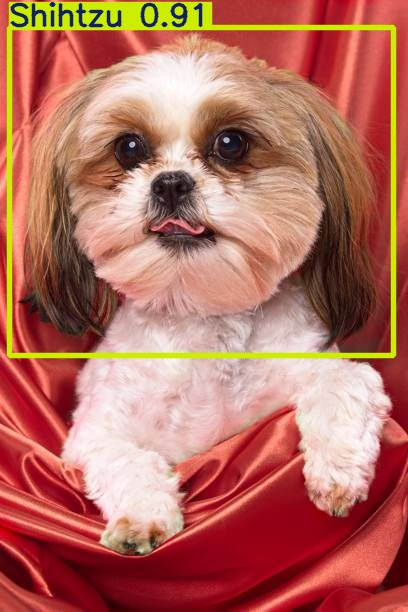

In [16]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp88/ShihtzuTest3.jpg')
cv2_imshow(img)

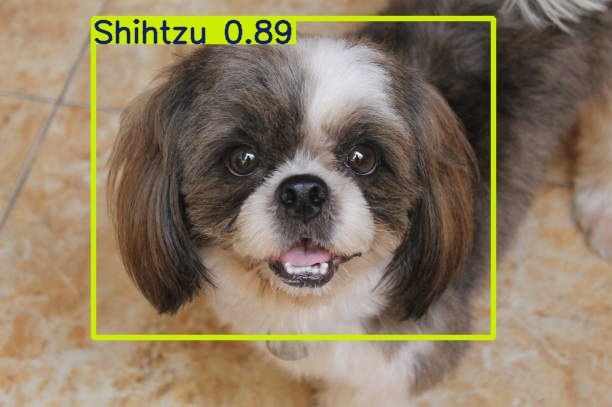

In [19]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp89/ShihtzuTest4.jpg')
cv2_imshow(img)

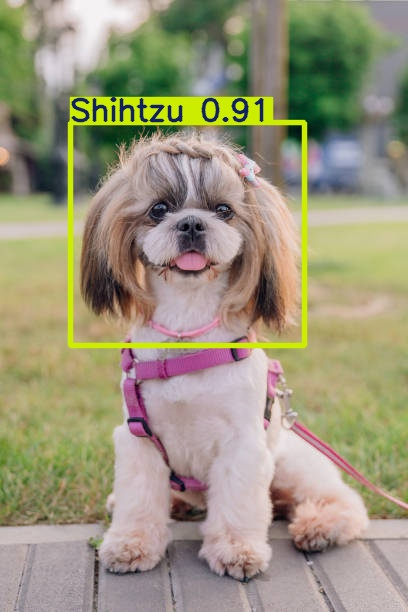

In [20]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp91/ShihtzuTest5.jpg')
cv2_imshow(img)

In [21]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PoodleTest3.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PoodleTest3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/PoodleTest3.jpg: 448x640 1 Poodle, 38.8ms
Speed: 0.7ms pre-process, 38.8ms inference, 594.8ms NMS per image at shape (1, 3, 640, 640)
Results sav

In [22]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PoodleTest4.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PoodleTest4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/PoodleTest4.jpg: 448x640 1 Poodle, 39.0ms
Speed: 0.6ms pre-process, 39.0ms inference, 529.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp93


In [23]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/PoodleTest5.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/PoodleTest5.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/PoodleTest5.jpg: 640x448 1 Poodle, 40.1ms
Speed: 0.8ms pre-process, 40.1ms inference, 586.5ms NMS per image at shape (1, 3, 640, 640)
Results sav

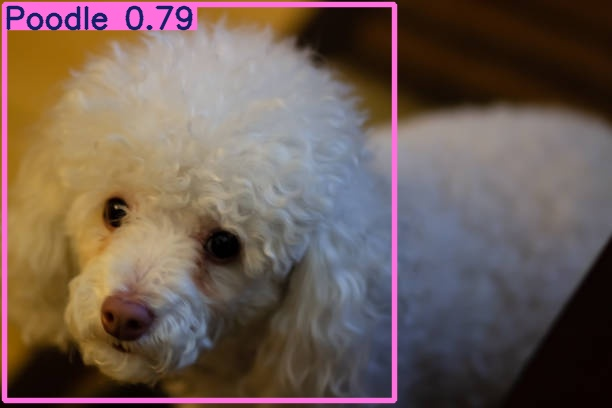

In [24]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp92/PoodleTest3.jpg')
cv2_imshow(img)

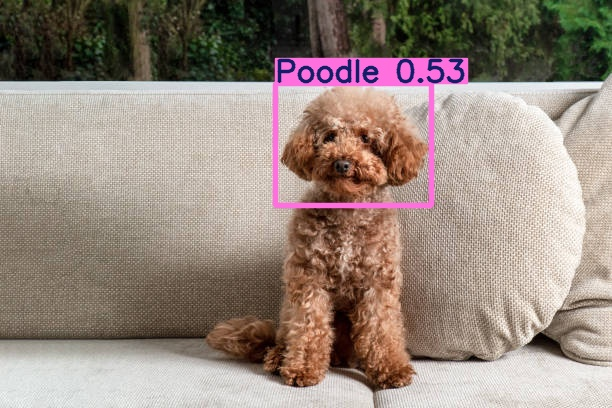

In [25]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp93/PoodleTest4.jpg')
cv2_imshow(img)

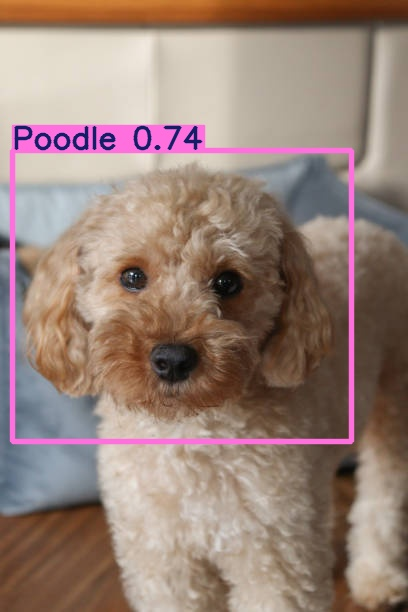

In [26]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp94/PoodleTest5.jpg')
cv2_imshow(img)

In [27]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/MalteseTest3.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/MalteseTest3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/MalteseTest3.jpg: 576x640 1 Maltese, 38.8ms
Speed: 0.7ms pre-process, 38.8ms inference, 526.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp95


In [28]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/MalteseTest4.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/MalteseTest4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/dog_testimage/MalteseTest4.jpg: 480x640 1 Maltese, 37.7ms
Speed: 0.7ms pre-process, 37.7ms inference, 578.2ms NMS per image at shape (1, 3, 640, 640)
Results 

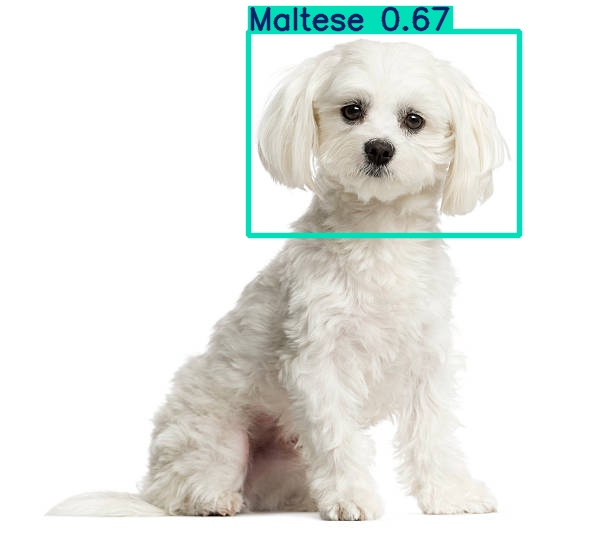

In [30]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp95/MalteseTest3.jpg')
cv2_imshow(img)

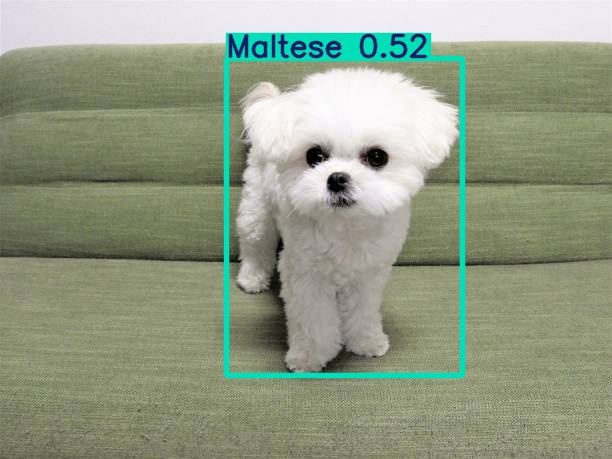

In [31]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp96/MalteseTest4.jpg')
cv2_imshow(img)

In [32]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/ChihuahuaTest7.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/ChihuahuaTest7.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/ChihuahuaTest7.jpg: 448x640 1 Chihuahua, 40.3ms
Speed: 0.8ms pre-process, 40.3ms inference, 533.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp97


In [33]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/dog_testimage/ChihuahuaTest8.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_9/weights/best.pt'], source=/content/drive/MyDrive/dog_testimage/ChihuahuaTest8.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/dog_testimage/ChihuahuaTest8.jpg: 448x640 1 Chihuahua, 39.2ms
Speed: 0.7ms pre-process, 39.2ms inference, 545.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp98


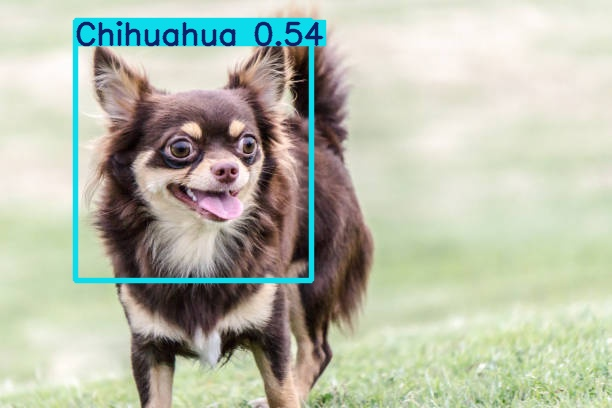

In [34]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp97/ChihuahuaTest7.jpg')
cv2_imshow(img)

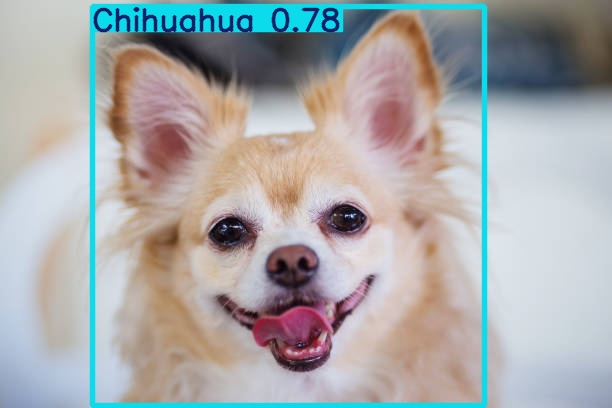

In [35]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp98/ChihuahuaTest8.jpg')
cv2_imshow(img)

**지난 모델 ver8에서 정확도가 낮게 검출되었던 몇 가지 강아지 종 클래스들의 Test Image 위주로 검출한 결과 detect를 하지 못하는 경우는 없었음. 다만 정확도가 낮게 검출되는 이미지들이 있어 ver10에서는 이런 부분을 보완해야 할듯.**